In [102]:
import pandas as pd
from prophet import Prophet

In [103]:
#dtype = {'date': 'datetime'}

df = pd.read_csv('../clean_data/data_modif.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.rename(columns={'date': 'ds'})

In [104]:
df['day'] = df['ds'].dt.day
df['month'] = df['ds'].dt.month
df['year'] = df['ds'].dt.year
df['ds'] = df['ds'].dt.date

In [105]:
df = (df.groupby([df['day'], df['month'], df['year']])
  .agg({'ds': 'first','Num_Acc' : 'count'})
  .reset_index()
  .drop(columns=['day', 'month', 'year'])
  .rename(columns={'Num_Acc': 'y'})
)

In [106]:
m = Prophet()
m.fit(df)

16:50:17 - cmdstanpy - INFO - Chain [1] start processing
16:50:17 - cmdstanpy - INFO - Chain [1] done processing


In [107]:
future = m.make_future_dataframe(periods=3000)
future.tail()

,ds
7077,2027-03-14
7078,2027-03-15
7079,2027-03-16
7080,2027-03-17
7081,2027-03-18


In [108]:
forecast_df = m.predict(future)
forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7077,2027-03-14,1.385035,-0.497982,3.209751
7078,2027-03-15,1.887568,0.099058,3.627244
7079,2027-03-16,2.099701,0.238908,3.758078
7080,2027-03-17,2.108745,0.384234,3.904924
7081,2027-03-18,2.158600,0.317811,3.869451


In [109]:
forecast_df.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

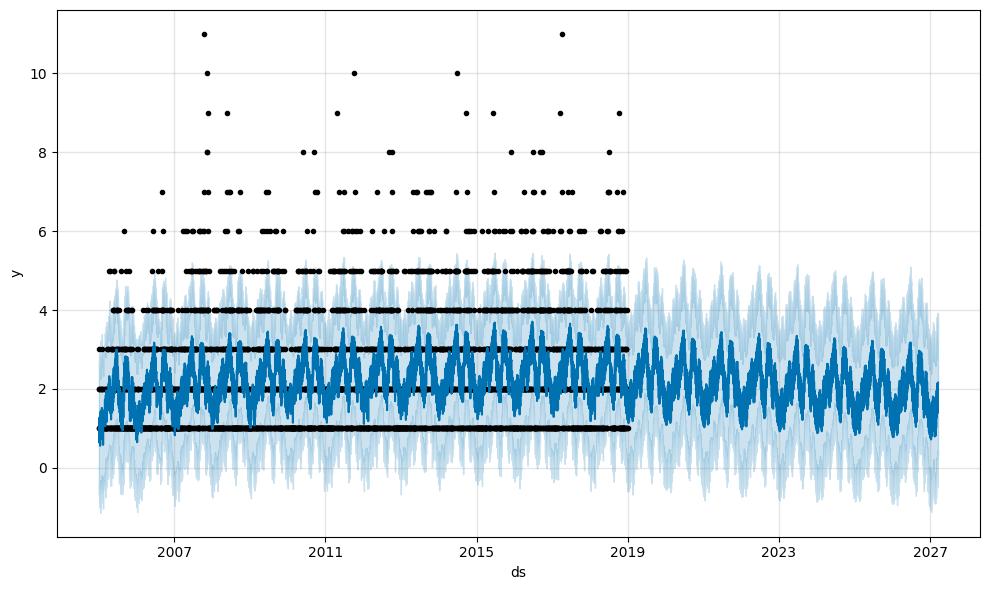

In [110]:
fig1 = m.plot(forecast_df)

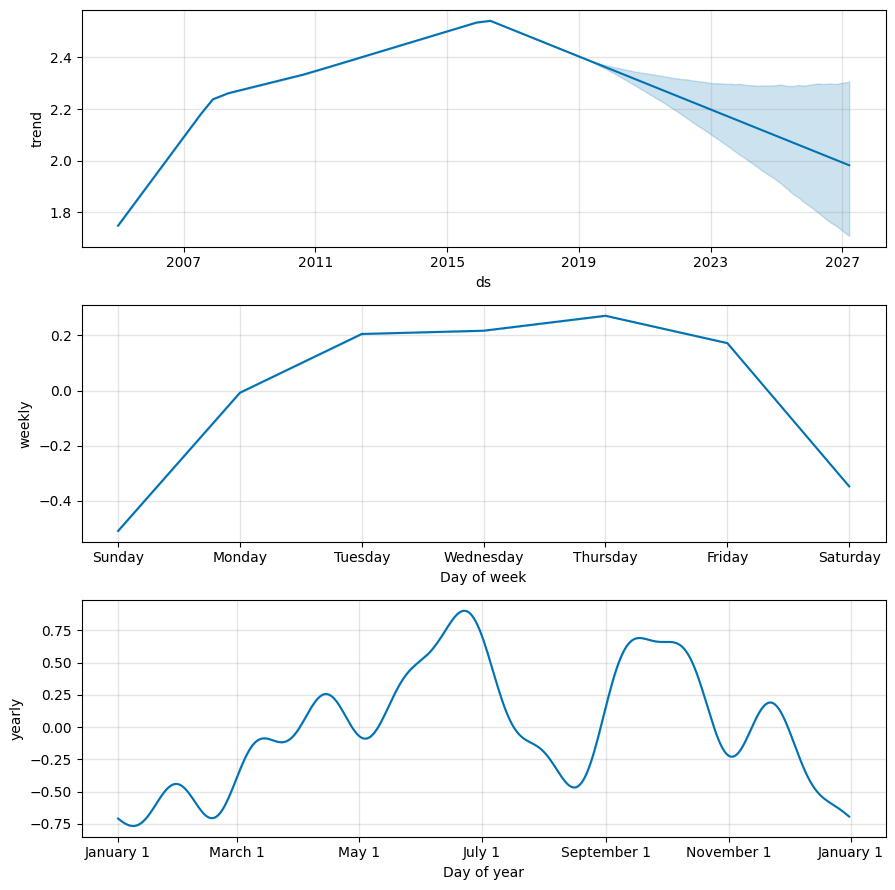

In [111]:
fig2 = m.plot_components(forecast_df);

In [112]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast_df)

In [113]:
plot_components_plotly(m, forecast_df)


In [114]:
def predict_n_accidents(d: str, model=model) -> float:
    """
    Takes a date and returns the expected number of accident for this given day.
    """
    _df = pd.DataFrame({'ds': [pd.to_datetime(d).date()]})
    return round(model.predict(_df)['yhat'][0], 2)

In [115]:
predict_n_accidents('2027-12-15')

1.67

In [117]:
# Saving model

from prophet.serialize import model_to_json, model_from_json

with open('../models/model_1.json', 'w') as fout:
    fout.write(model_to_json(m))  # Save model

# with open('serialized_model.json', 'r') as fin:
#     m = model_from_json(fin.read())  # Load model